<a href="https://colab.research.google.com/github/Abel-kaiki/Modelling/blob/main/Traditional_model_for_project_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from scipy.optimize import curve_fit
from sklearn.metrics import r2_score
import time

from google.colab import drive
drive.mount("/content/drive")

# Load dataset
path = '/content/drive/MyDrive/ColabNotebooks/Datasets/ANN model test3.csv' #Adjust file path based on use case.

# Start timer
start_time = time.time()

# Read the data
df = pd.read_csv(path)

# Define the model
def Model(X, a, b, c, d, e, f, g, h, i, j, k):
    T, pH, RPM, tf = X.T
    return a + b*T + c*pH + d*RPM + e*tf + f*T*pH + g*T*RPM + h*T**2 + i*pH**2 + j*RPM**2 + k*tf**2

# Define the data
X_raw = np.array(df[['Temperature', 'pH', 'RPM', 'Time']])
y = np.array(df[['Cell']])

# transform the independent variables
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X_raw)

# Fit the model and print result
popt, pcov = curve_fit(Model, X_scaled, y.ravel())
print(popt)

# End and print run time
end_time = time.time()
run_time = end_time - start_time
print(f"Run time: {run_time:.3f} seconds")

Mounted at /content/drive
[ 22.63        -0.77333333  12.165       -2.635        3.13666667
  22.71        -3.85       -18.70166667 -12.30166667   3.69833333
  -4.80166667]
Run time: 1.087 seconds


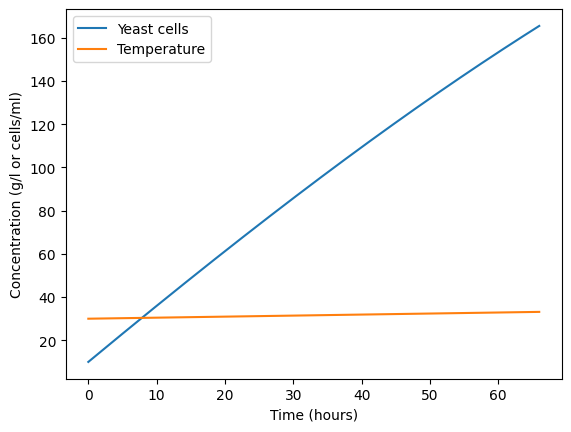

Run time: 0.347 seconds


In [ ]:
from scipy.integrate import odeint

# Simulation parameters
t0 = 0        # initial time (hours)
dt = 0.1      # time step (hours)
V = 3       # volume of fermentation vessel (liters)
Cell0 = 10   # initial yeast cell concentration (cells/l)
deltaH = 0    # heat release per g of cell growth (kJ/g)
import time

# Start timer
start_time = time.time()

#enviroment
T0 = 30 #Temperature
pH=7 #pH
RPM=120 #Stirrer speed
tf = 66 # final time (hours)

# Define differential equations
def ferm_eqns(y, t):
    Cell,T = y
    input=np.array([T,pH,RPM,tf]).reshape(1,4)
    input = pd.DataFrame(input, columns=['Temperature', 'pH', 'RPM','Time'])
    scaler.fit(df[['Temperature', 'pH', 'RPM', 'Time']])
    scaled_input = np.array(scaler.transform(input))

    if T <= 37 and T>=20:
        T_1=scaled_input[0,0]
        pH_1=scaled_input[0,1]
        RPM_1=scaled_input[0,2]
        tf_1=scaled_input[0,3]
        dCell_dt = Model(scaled_input, *popt).flatten()[0]/10
        dT_dt=(dCell_dt*deltaH+RPM*0.005)/4.184/3;
    else:
        dCell_dt=-0.05*Cell
        dT_dt=0

    return [dCell_dt,dT_dt]
# Initial conditions
y0 = [ Cell0, T0]

# Solve differential equations
t = np.arange(t0, tf+dt, dt)
sol = odeint(ferm_eqns, y0, t)

# Extract solution components
Cell = sol[:, 0]
T=sol[:,1]
# Plot results
plt.plot(t, Cell, label='Yeast cells')
plt.plot(t, T, label='Temperature')
plt.xlabel('Time (hours)')
plt.ylabel('Concentration (g/l or cells/ml)')
plt.legend()
plt.show()

# End and print run time
end_time = time.time()
run_time = end_time - start_time
print(f"Run time: {run_time:.3f} seconds")

In [ ]:
print(max(Cell))

165.4885169094124
